In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Electric_Vehicle_Population_Data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
df_sub = df[["County", "City", "State", "Vehicle Location"]]

In [ ]:
df_sub = df_sub.dropna()

In [ ]:
df_sub.head()

,County,City,State,Vehicle Location
0,Yakima,Yakima,WA,POINT (-120.524012 46.5973939)
1,Thurston,Olympia,WA,POINT (-122.817545 46.98876)
2,King,Renton,WA,POINT (-122.1298876 47.4451257)
3,Snohomish,Bothell,WA,POINT (-122.1873 47.820245)
4,King,Kent,WA,POINT (-122.2012521 47.3931814)


In [ ]:
location = df_sub["Vehicle Location"]
df_sub[['Longitude', 'Latitude']] = df_sub['Vehicle Location'].str.extract(r'POINT \((?P<Longitude>[-.\d]+) (?P<Latitude>[-.\d]+)\)')

# Convert the columns to float
df_sub['Longitude'] = df_sub['Longitude'].astype(float)
df_sub['Latitude'] = df_sub['Latitude'].astype(float)


In [ ]:
df_sub.to_csv('file2.csv', header=False, index=False)


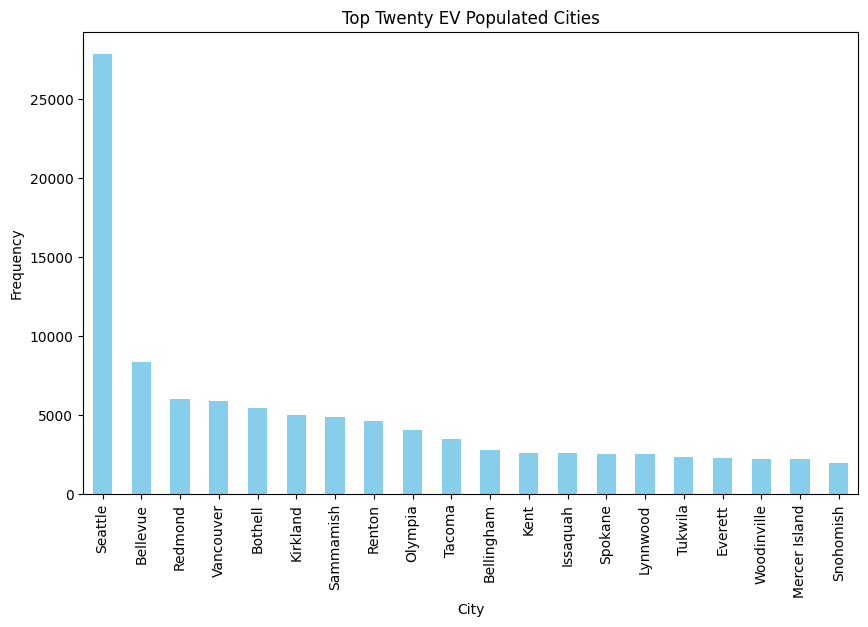

In [ ]:
city_counts = df_sub['City'].value_counts()

# Select the top twenty most frequent counties
top_cities = city_counts.head(20).index

# Filter the DataFrame for the top twenty counties
filtered_df = df_sub[df_sub['City'].isin(top_cities)]

# Plot the histogram
plt.figure(figsize=(10, 6))
filtered_df['City'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Top Twenty EV Populated Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

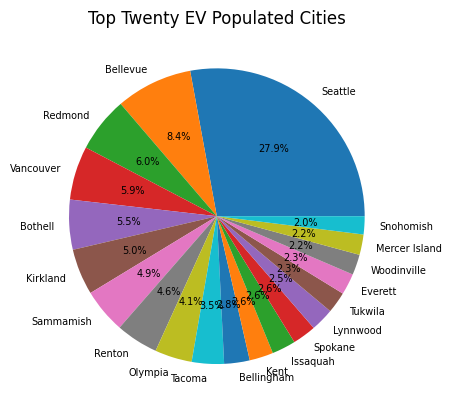

In [ ]:
# Plot the pie chart
labels = top_cities
sizes = df_sub['City'].value_counts().head(20)
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels, textprops={'fontsize': 7}, autopct='%1.1f%%')
_ = plt.title('Top Twenty EV Populated Cities')

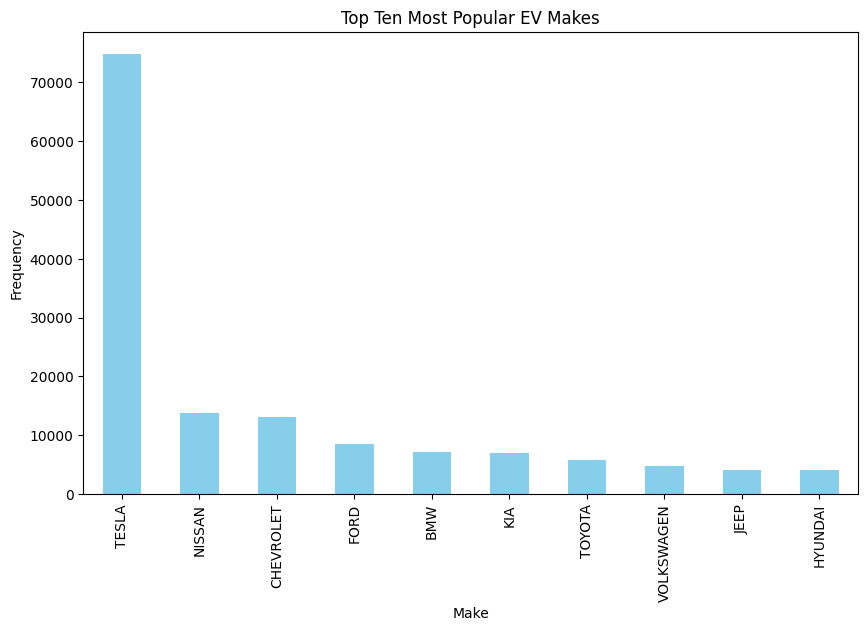

In [ ]:
make_counts = df['Make'].value_counts()

# Select the top ten most frequent counties
top_makes = make_counts.head(10).index

# Filter the DataFrame for the top ten counties
filtered_df1 = df[df['Make'].isin(top_makes)]

# Plot the histogram
plt.figure(figsize=(10, 6))
filtered_df1["Make"].value_counts().plot(kind='bar', color='skyblue')
plt.title('Top Ten Most Popular EV Makes')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.show()

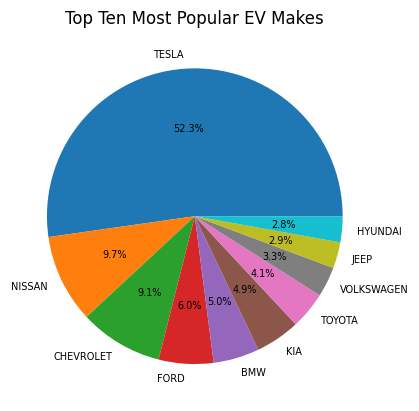

In [ ]:
# Plot the pie chart
labels = top_makes
sizes = df['Make'].value_counts().head(10)
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels, textprops={'fontsize': 7}, autopct='%1.1f%%')
_ = plt.title('Top Ten Most Popular EV Makes')

In [ ]:
df["make_model"] = df['Make'] + ' ' + df['Model']
make_model_counts = df['make_model'].value_counts()
top_model_counts = make_model_counts.head(10)
top_model_counts

TESLA MODEL Y          32822
TESLA MODEL 3          28926
NISSAN LEAF            13274
TESLA MODEL S           7611
CHEVROLET BOLT EV       6413
TESLA MODEL X           5429
CHEVROLET VOLT          4825
VOLKSWAGEN ID.4         3647
JEEP WRANGLER           3161
FORD MUSTANG MACH-E     3107
Name: make_model, dtype: int64

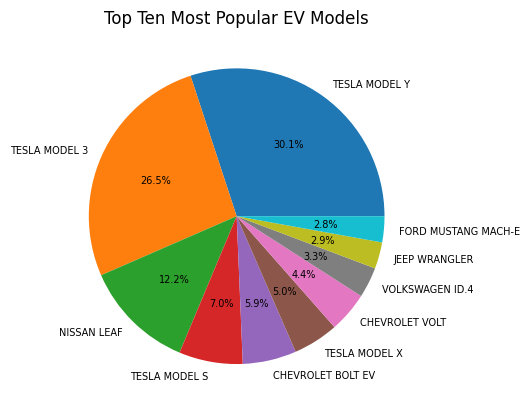

In [ ]:
labels = top_model_counts.index
sizes = top_model_counts
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels, textprops={'fontsize': 7}, autopct='%1.1f%%')
_ = plt.title('Top Ten Most Popular EV Models')

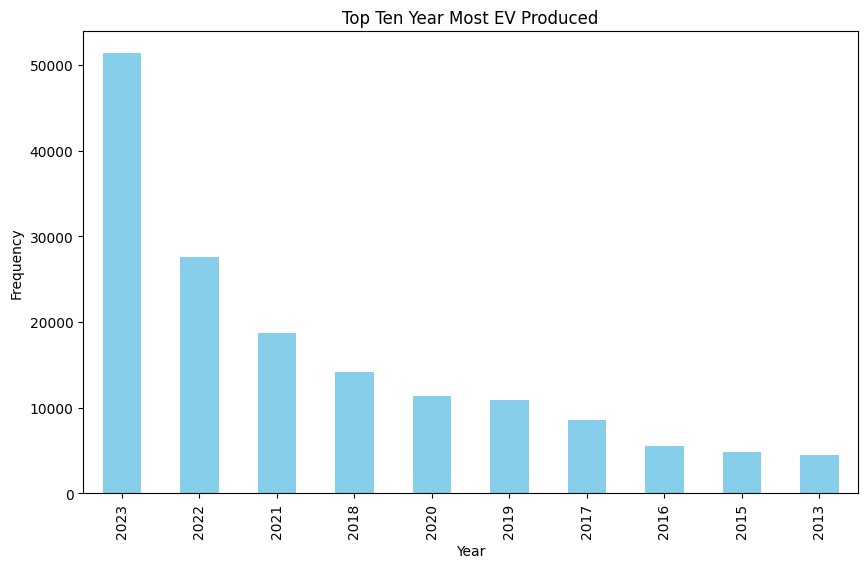

In [ ]:
year_counts = df['Model Year'].value_counts()

# Select the top ten most frequent counties
top_years = year_counts.head(10).index

# Filter the DataFrame for the top twenty counties
filtered_df2 = df[df['Model Year'].isin(top_years)]

# Plot the histogram
plt.figure(figsize=(10, 6))
filtered_df2["Model Year"].value_counts().plot(kind='bar', color='skyblue')
plt.title('Top Ten Year Most EV Produced')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
year = year_counts.index
year.sort_values()[-11:-1]
df['Model Year'].value_counts()


Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64')

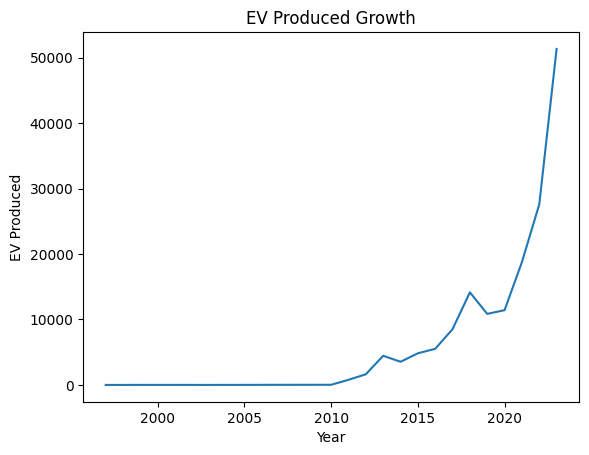

In [ ]:
df_counts = year_counts.reset_index()
df_counts = df_counts.sort_values('index')
df_counts = df_counts[df_counts["index"] < 2024]
plt.plot(df_counts["index"], df_counts["Model Year"])
plt.title('EV Produced Growth')
plt.xlabel('Year')
plt.ylabel('EV Produced')
plt.show()

In [ ]:
df_counts

,index,Model Year
20,1997,1
19,1998,1
17,1999,3
16,2000,7
18,2002,2
21,2003,1
15,2008,20
14,2010,23
13,2011,782
12,2012,1630


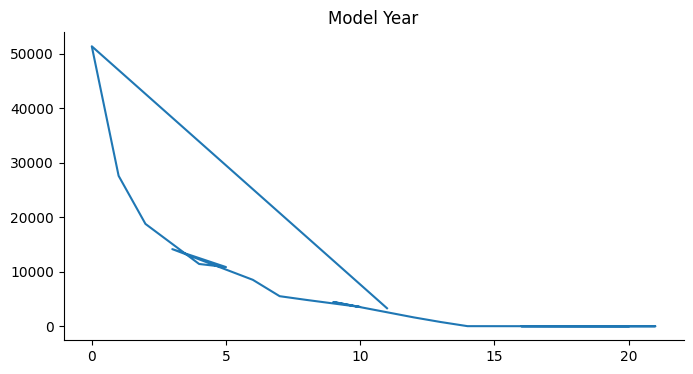

In [ ]:
# @title Model Year

from matplotlib import pyplot as plt
df_counts['Model Year'].plot(kind='line', figsize=(8, 4), title='Model Year')
plt.gca().spines[['top', 'right']].set_visible(False)



---
